In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
words = open("names.txt").read().splitlines()

In [3]:
tokens = ['.'] + sorted(list(set(''.join(words))))
atoi = { a:i for i,a in enumerate(tokens) }
itoa = { i:a for a,i in atoi.items() }

In [4]:
xs = []
ys = []
for word in words[:1]:
    word = list('.' + word + '.')
    bigrams = zip(word, word[1:])
    
    for ch1, ch2 in bigrams:
        print(ch1, ch2, atoi[ch1],atoi[ch2])
        xs.append(atoi[ch1])
        ys.append(atoi[ch2])

. e 0 5
e m 5 13
m m 13 13
m a 13 1
a . 1 0


In [5]:
XS = torch.tensor(xs)
YS = torch.tensor(ys)

In [6]:
xenc = F.one_hot(XS, len(tokens)).float()

In [7]:
yenc = F.one_hot(YS, len(tokens)).float()

In [8]:
generator = torch.Generator().manual_seed(2147483647)

In [9]:
W = torch.randn((27,27), generator=generator)

In [10]:
import matplotlib.pyplot as plt

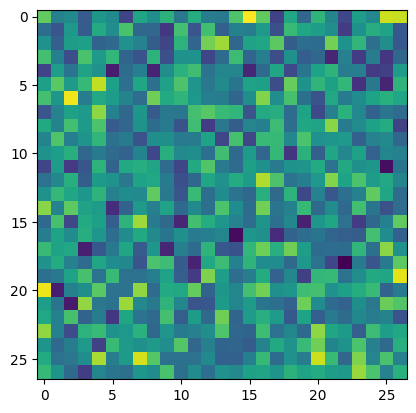

In [11]:
plt.imshow(W)

In [12]:
# forward pass
wx = xenc @ W  # aka logits or log counts
# the follwing is called softmax activation
WX = torch.exp(wx) # use exponentiation to get the actual counts
P = WX / WX.sum(1, keepdim=True) # create a probability distribution for the counts

In [13]:
P[0] # probability distribution w.r.t the input xenc[0]

tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])

In [14]:
nlls = torch.zeros(len(xs))
for i in range(len(xs)):
    print("Input =",itoa[xs[i]], "Label=", itoa[ys[i]], "Prob={0:.3f}".format(P[i, ys[i]].item()))
    nlls[i] = -1 * P[i, ys[i]].log()

print("NLL {0:.3f}".format(nlls.mean().item()))

Input = . Label= e Prob=0.012
Input = e Label= m Prob=0.018
Input = m Label= m Prob=0.027
Input = m Label= a Prob=0.074
Input = a Label= . Prob=0.015
NLL 3.769


In [15]:
len(xs)

5

In [16]:
# A better way than manually iterating over the batch is by doing arange, nll is same as that loss
loss = -1 * P[torch.arange(len(xs)), ys].log().mean().item()
loss

3.7693049907684326

In [17]:
# recap - init weights
generator = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=generator, requires_grad=True)

In [18]:
# forward pass
logits = (xenc @ W)
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
loss = -1 * probs[torch.arange(len(xs)), ys].log().mean()
loss

tensor(3.7693, grad_fn=<MulBackward0>)

In [19]:
# backward pass
W.grad = None
loss.backward()
# gradient tells us about the influence of weights on the loss, we can update the weights by reducing the weights as follows
W.data += -1 * W.grad

In [20]:
nlls = torch.zeros(len(xs))
for i in range(len(xs)):
    print("Input =",itoa[xs[i]], "Label=", itoa[ys[i]], "Prob={0:.3f}".format(probs[i, ys[i]].item()))
    nlls[i] = -1 * probs[i, ys[i]].log()

print("Loss {0:.3f}".format(nlls.mean().item()))

Input = . Label= e Prob=0.012
Input = e Label= m Prob=0.018
Input = m Label= m Prob=0.027
Input = m Label= a Prob=0.074
Input = a Label= . Prob=0.015
Loss 3.769


In [21]:
# encoding inputs
xs = []
ys = []
for word in words:
    word = list('.' + word + '.')
    bigrams = zip(word, word[1:])
    
    for ch1, ch2 in bigrams:
        print(ch1, ch2, atoi[ch1],atoi[ch2])
        xs.append(atoi[ch1])
        ys.append(atoi[ch2])

XS = torch.tensor(xs)
xenc = F.one_hot(XS, len(tokens)).float()


generator = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator=generator, requires_grad=True)
loss = None

. e 0 5
e m 5 13
m m 13 13
m a 13 1
a . 1 0
. o 0 15
o l 15 12
l i 12 9
i v 9 22
v i 22 9
i a 9 1
a . 1 0
. a 0 1
a v 1 22
v a 22 1
a . 1 0
. i 0 9
i s 9 19
s a 19 1
a b 1 2
b e 2 5
e l 5 12
l l 12 12
l a 12 1
a . 1 0
. s 0 19
s o 19 15
o p 15 16
p h 16 8
h i 8 9
i a 9 1
a . 1 0
. c 0 3
c h 3 8
h a 8 1
a r 1 18
r l 18 12
l o 12 15
o t 15 20
t t 20 20
t e 20 5
e . 5 0
. m 0 13
m i 13 9
i a 9 1
a . 1 0
. a 0 1
a m 1 13
m e 13 5
e l 5 12
l i 12 9
i a 9 1
a . 1 0
. h 0 8
h a 8 1
a r 1 18
r p 18 16
p e 16 5
e r 5 18
r . 18 0
. e 0 5
e v 5 22
v e 22 5
e l 5 12
l y 12 25
y n 25 14
n . 14 0
. a 0 1
a b 1 2
b i 2 9
i g 9 7
g a 7 1
a i 1 9
i l 9 12
l . 12 0
. e 0 5
e m 5 13
m i 13 9
i l 9 12
l y 12 25
y . 25 0
. e 0 5
e l 5 12
l i 12 9
i z 9 26
z a 26 1
a b 1 2
b e 2 5
e t 5 20
t h 20 8
h . 8 0
. m 0 13
m i 13 9
i l 9 12
l a 12 1
a . 1 0
. e 0 5
e l 5 12
l l 12 12
l a 12 1
a . 1 0
. a 0 1
a v 1 22
v e 22 5
e r 5 18
r y 18 25
y . 25 0
. s 0 19
s o 19 15
o f 15 6
f i 6 9
i a 9 1
a . 1 0
. c 0 3
c 

r i 18 9
i s 9 19
s a 19 1
a . 1 0
. n 0 14
n a 14 1
a y 1 25
y l 25 12
l a 12 1
a n 1 14
n i 14 9
i . 9 0
. n 0 14
n u 14 21
u b 21 2
b i 2 9
i a 9 1
a . 1 0
. p 0 16
p h 16 8
h o 8 15
o e 15 5
e n 5 14
n y 14 25
y x 25 24
x . 24 0
. r 0 18
r a 18 1
a n 1 14
n a 14 1
a . 1 0
. r 0 18
r a 18 1
a y 1 25
y l 25 12
l a 12 1
a . 1 0
. r 0 18
r a 18 1
a y 1 25
y l 25 12
l y 12 25
y n 25 14
n . 14 0
. r 0 18
r o 18 15
o x 15 24
x i 24 9
i e 9 5
e . 5 0
. s 0 19
s a 19 1
a y 1 25
y a 25 1
a . 1 0
. s 0 19
s i 19 9
i l 9 12
l v 12 22
v a 22 1
a n 1 14
n a 14 1
a . 1 0
. s 0 19
s i 19 9
i r 9 18
r e 18 5
e n 5 14
n a 14 1
a . 1 0
. s 0 19
s u 19 21
u z 21 26
z a 26 1
a n 1 14
n n 14 14
n e 14 5
e . 5 0
. x 0 24
x e 24 5
e n 5 14
n i 14 9
i a 9 1
a . 1 0
. a 0 1
a d 1 4
d i 4 9
i a 9 1
a . 1 0
. a 0 1
a l 1 12
l e 12 5
e e 5 5
e y 5 25
y a 25 1
a h 1 8
h . 8 0
. a 0 1
a l 1 12
l e 12 5
e i 5 9
i d 9 4
d a 4 1
a . 1 0
. a 0 1
a l 1 12
l l 12 12
l e 12 5
e g 5 7
g r 7 18
r a 18 1
a . 1 0
. a 0 1
a

. n 0 14
n y 14 25
y e 25 5
e l 5 12
l l 12 12
l i 12 9
i e 9 5
e . 5 0
. n 0 14
n y 14 25
y l 25 12
l i 12 9
i a 9 1
a h 1 8
h . 8 0
. n 0 14
n y 14 25
y m 25 13
m e 13 5
e r 5 18
r i 18 9
i a 9 1
a . 1 0
. o 0 15
o a 15 1
a k 1 11
k l 11 12
l y 12 25
y n 25 14
n n 14 14
n e 14 5
e . 5 0
. o 0 15
o l 15 12
l i 12 9
i v 9 22
v i 22 9
i a 9 1
a g 1 7
g r 7 18
r a 18 1
a c 1 3
c e 3 5
e . 5 0
. o 0 15
o l 15 12
l i 12 9
i v 9 22
v i 22 9
i a 9 1
a r 1 18
r o 18 15
o s 15 19
s e 19 5
e . 5 0
. p 0 16
p a 16 1
a g 1 7
g e 7 5
e . 5 0
. p 0 16
p a 16 1
a t 1 20
t r 20 18
r i 18 9
i c 9 3
c e 3 5
e . 5 0
. p 0 16
p h 16 8
h a 8 1
a e 1 5
e d 5 4
d r 4 18
r a 18 1
a . 1 0
. p 0 16
p u 16 21
u r 21 18
r i 18 9
i t 9 20
t y 20 25
y . 25 0
. q 0 17
q u 17 21
u i 21 9
i n 9 14
n l 14 12
l y 12 25
y n 25 14
n . 14 0
. q 0 17
q u 17 21
u i 21 9
i n 9 14
n n 14 14
n l 14 12
l e 12 5
e e 5 5
e . 5 0
. r 0 18
r a 18 1
a e 1 5
e l 5 12
l l 12 12
l e 12 5
e . 5 0
. r 0 18
r a 18 1
a e 1 5
e v 5 22
v e 2

y l 25 12
l e 12 5
e e 5 5
e a 5 1
a n 1 14
n n 14 14
n . 14 0
. s 0 19
s a 19 1
a b 1 2
b e 2 5
e r 5 18
r . 18 0
. s 0 19
s a 19 1
a d 1 4
d a 4 1
a . 1 0
. s 0 19
s a 19 1
a d 1 4
d d 4 4
d i 4 9
i e 9 5
e . 5 0
. s 0 19
s a 19 1
a d 1 4
d o 4 15
o r 15 18
r . 18 0
. s 0 19
s a 19 1
a f 1 6
f i 6 9
i a 9 1
a t 1 20
t o 20 15
o u 15 21
u . 21 0
. s 0 19
s a 19 1
a i 1 9
i . 9 0
. s 0 19
s a 19 1
a k 1 11
k i 11 9
i n 9 14
n a 14 1
a h 1 8
h . 8 0
. s 0 19
s a 19 1
a m 1 13
m a 13 1
a i 1 9
i . 9 0
. s 0 19
s a 19 1
a m 1 13
m a 13 1
a y 1 25
y . 25 0
. s 0 19
s a 19 1
a m 1 13
m u 13 21
u e 21 5
e l 5 12
l l 12 12
l a 12 1
a . 1 0
. s 0 19
s a 19 1
a n 1 14
n a 14 1
a y 1 25
y a 25 1
a h 1 8
h . 8 0
. s 0 19
s a 19 1
a r 1 18
r a 18 1
a i 1 9
i y 9 25
y a 25 1
a . 1 0
. s 0 19
s a 19 1
a r 1 18
r a 18 1
a l 1 12
l y 12 25
y n 25 14
n . 14 0
. s 0 19
s a 19 1
a r 1 18
r a 18 1
a n 1 14
n . 14 0
. s 0 19
s a 19 1
a r 1 18
r y 18 25
y n 25 14
n . 14 0
. s 0 19
s a 19 1
a v 1 22
v a 22 1

t . 20 0
. a 0 1
a d 1 4
d a 4 1
a i 1 9
i . 9 0
. a 0 1
a d 1 4
d a 4 1
a l 1 12
l a 12 1
a i 1 9
i n 9 14
n a 14 1
a . 1 0
. a 0 1
a d 1 4
d a 4 1
a l 1 12
l e 12 5
e y 5 25
y a 25 1
a . 1 0
. a 0 1
a d 1 4
d a 4 1
a l 1 12
l y 12 25
y n 25 14
n a 14 1
a . 1 0
. a 0 1
a d 1 4
d a 4 1
a m 1 13
m . 13 0
. a 0 1
a d 1 4
d a 4 1
a n 1 14
n . 14 0
. a 0 1
a d 1 4
d a 4 1
a r 1 18
r i 18 9
i a 9 1
a . 1 0
. a 0 1
a d 1 4
d d 4 4
d l 4 12
l y 12 25
y n 25 14
n . 14 0
. a 0 1
a d 1 4
d e 4 5
e l 5 12
l l 12 12
l y 12 25
y n 25 14
n . 14 0
. a 0 1
a d 1 4
d e 4 5
e n 5 14
n a 14 1
a . 1 0
. a 0 1
a d 1 4
d e 4 5
e s 5 19
s i 19 9
i r 9 18
r e 18 5
e . 5 0
. a 0 1
a d 1 4
d i 4 9
i a 9 1
a n 1 14
n a 14 1
a . 1 0
. a 0 1
a d 1 4
d i 4 9
i l 9 12
l y 12 25
y n 25 14
n e 14 5
e . 5 0
. a 0 1
a d 1 4
d m 4 13
m i 13 9
i r 9 18
r e 18 5
e . 5 0
. a 0 1
a d 1 4
d o 4 15
o n 15 14
n i 14 9
i a 9 1
a . 1 0
. a 0 1
a d 1 4
d r 4 18
r e 18 5
e a 5 1
a n 1 14
n a 14 1
a . 1 0
. a 0 1
a d 1 4
d r 4 18
r 

m y 13 25
y l 25 12
l o 12 15
o v 15 22
v e 22 5
e . 5 0
. m 0 13
m y 13 25
y r 25 18
r c 18 3
c e 3 5
e l 5 12
l l 12 12
l a 12 1
a . 1 0
. n 0 14
n a 14 1
a b 1 2
b e 2 5
e e 5 5
e h 5 8
h a 8 1
a . 1 0
. n 0 14
n a 14 1
a c 1 3
c a 3 1
a r 1 18
r i 18 9
i . 9 0
. n 0 14
n a 14 1
a d 1 4
d a 4 1
a l 1 12
l y 12 25
y n 25 14
n . 14 0
. n 0 14
n a 14 1
a d 1 4
d e 4 5
e l 5 12
l y 12 25
y n 25 14
n . 14 0
. n 0 14
n a 14 1
a h 1 8
h y 8 25
y l 25 12
l a 12 1
a . 1 0
. n 0 14
n a 14 1
a i 1 9
i e 9 5
e l 5 12
l l 12 12
l e 12 5
e . 5 0
. n 0 14
n a 14 1
a i 1 9
i j 9 10
j a 10 1
a h 1 8
h . 8 0
. n 0 14
n a 14 1
a i 1 9
i r 9 18
r a 18 1
a h 1 8
h . 8 0
. n 0 14
n a 14 1
a i 1 9
i y 9 25
y l 25 12
l a 12 1
a h 1 8
h . 8 0
. n 0 14
n a 14 1
a k 1 11
k h 11 8
h y 8 25
y l 25 12
l a 12 1
a . 1 0
. n 0 14
n a 14 1
a k 1 11
k i 11 9
i r 9 18
r a 18 1
a . 1 0
. n 0 14
n a 14 1
a k 1 11
k o 11 15
o t 15 20
t a 20 1
a . 1 0
. n 0 14
n a 14 1
a k 1 11
k y 11 25
y l 25 12
l a 12 1
a . 1 0
. n 0 1

t z 20 26
z y 26 25
y . 25 0
. r 0 18
r e 18 5
e j 5 10
j i 10 9
i n 9 14
n a 14 1
a . 1 0
. r 0 18
r e 18 5
e m 5 13
m i 13 9
i a 9 1
a . 1 0
. r 0 18
r e 18 5
e m 5 13
m i 13 9
i y 9 25
y a 25 1
a h 1 8
h . 8 0
. r 0 18
r e 18 5
e m 5 13
m l 13 12
l e 12 5
e y 5 25
y . 25 0
. r 0 18
r e 18 5
e n 5 14
n d 14 4
d i 4 9
i . 9 0
. r 0 18
r e 18 5
e t 5 20
t a 20 1
a g 1 7
g . 7 0
. r 0 18
r e 18 5
e v 5 22
v y 22 25
y . 25 0
. r 0 18
r h 18 8
h a 8 1
a e 1 5
e . 5 0
. r 0 18
r h 18 8
h a 8 1
a p 1 16
p s 16 19
s o 19 15
o d 15 4
d y 4 25
y . 25 0
. r 0 18
r h 18 8
h e 8 5
e a 5 1
a l 1 12
l e 12 5
e e 5 5
e . 5 0
. r 0 18
r h 18 8
h e 8 5
e a 5 1
a l 1 12
l y 12 25
y n 25 14
n . 14 0
. r 0 18
r h 18 8
h e 8 5
e n 5 14
n n 14 14
n . 14 0
. r 0 18
r h 18 8
h e 8 5
e t 5 20
t t 20 20
t a 20 1
a . 1 0
. r 0 18
r h 18 8
h e 8 5
e t 5 20
t t 20 20
t l 20 12
l e 12 5
e e 5 5
e . 5 0
. r 0 18
r h 18 8
h i 8 9
i a 9 1
a . 1 0
. r 0 18
r h 18 8
h y 8 25
y a 25 1
a n 1 14
n n 14 14
n a 14 1
a . 1 0

r o 18 15
o n 15 14
n . 14 0
. t 0 20
t r 20 18
r a 18 1
a y 1 25
y v 25 22
v o 22 15
o n 15 14
n . 14 0
. w 0 23
w i 23 9
i s 9 19
s d 19 4
d o 4 15
o m 15 13
m . 13 0
. a 0 1
a c 1 3
c e 3 5
e s 5 19
s o 19 15
o n 15 14
n . 14 0
. a 0 1
a l 1 12
l p 12 16
p h 16 8
h a 8 1
a . 1 0
. a 0 1
a r 1 18
r i 18 9
i c 9 3
c . 3 0
. a 0 1
a s 1 19
s h 19 8
h w 8 23
w i 23 9
i n 9 14
n . 14 0
. a 0 1
a y 1 25
y u 25 21
u s 21 19
s h 19 8
h . 8 0
. b 0 2
b l 2 12
l a 12 1
a y 1 25
y z 25 26
z e 26 5
e . 5 0
. b 0 2
b r 2 18
r i 18 9
i s 9 19
s o 19 15
o n 15 14
n . 14 0
. c 0 3
c a 3 1
a i 1 9
i n 9 14
n e 14 5
e n 5 14
n . 14 0
. c 0 3
c h 3 8
h a 8 1
a y 1 25
y s 25 19
s e 19 5
e . 5 0
. c 0 3
c h 3 8
h e 8 5
e t 5 20
t . 20 0
. d 0 4
d a 4 1
a r 1 18
r s 18 19
s h 19 8
h . 8 0
. d 0 4
d e 4 5
e e 5 5
e n 5 14
n . 14 0
. e 0 5
e i 5 9
i d 9 4
d a 4 1
a n 1 14
n . 14 0
. e 0 5
e r 5 18
r w 18 23
w i 23 9
i n 9 14
n . 14 0
. h 0 8
h a 8 1
a z 1 26
z i 26 9
i e 9 5
e l 5 12
l . 12 0
. j 0 10
j a 

k . 11 0
. j 0 10
j a 10 1
a i 1 9
i d 9 4
d a 4 1
a n 1 14
n . 14 0
. j 0 10
j a 10 1
a i 1 9
i m 9 13
m e 13 5
e s 5 19
s o 19 15
o n 15 14
n . 14 0
. j 0 10
j a 10 1
a r 1 18
r o 18 15
o d 15 4
d . 4 0
. j 0 10
j a 10 1
a s 1 19
s s 19 19
s o 19 15
o n 15 14
n . 14 0
. j 0 10
j a 10 1
a v 1 22
v o 22 15
o n 15 14
n n 14 14
n i 14 9
i . 9 0
. j 0 10
j a 10 1
a x 1 24
x s 24 19
s t 19 20
t y 20 25
y n 25 14
n . 14 0
. j 0 10
j a 10 1
a y 1 25
y m 25 13
m i 13 9
i s 9 19
s o 19 15
o n 15 14
n . 14 0
. j 0 10
j a 10 1
a y 1 25
y r 25 18
r o 18 15
o n 15 14
n . 14 0
. j 0 10
j o 10 15
o h 15 8
h n 8 14
n y 14 25
y . 25 0
. j 0 10
j o 10 15
o s 15 19
s i 19 9
i a 9 1
a n 1 14
n . 14 0
. j 0 10
j u 10 21
u l 21 12
l l 12 12
l i 12 9
i e 9 5
e n 5 14
n . 14 0
. j 0 10
j y 10 25
y a 25 1
a i 1 9
i r 9 18
r e 18 5
e . 5 0
. k 0 11
k a 11 1
a e 1 5
e s 5 19
s e 19 5
e n 5 14
n . 14 0
. k 0 11
k a 11 1
a i 1 9
i g 9 7
g e 7 5
e . 5 0
. k 0 11
k a 11 1
a i 1 9
i l 9 12
l a 12 1
a n 1 14
n d 14 4

a i 1 9
i a 9 1
a . 1 0
. i 0 9
i m 9 13
m a 13 1
a n 1 14
n u 14 21
u e 21 5
e l 5 12
l . 12 0
. i 0 9
i s 9 19
s a 19 1
a d 1 4
d o 4 15
o r 15 18
r e 18 5
e . 5 0
. i 0 9
i s 9 19
s a 19 1
a i 1 9
i a 9 1
a . 1 0
. i 0 9
i s 9 19
s a 19 1
a i 1 9
i y 9 25
y a 25 1
a h 1 8
h . 8 0
. i 0 9
i s 9 19
s a 19 1
a m 1 13
m . 13 0
. i 0 9
i s 9 19
s h 19 8
h a 8 1
a a 1 1
a q 1 17
q . 17 0
. i 0 9
i s 9 19
s s 19 19
s a 19 1
a h 1 8
h . 8 0
. i 0 9
i s 9 19
s s 19 19
s a 19 1
a i 1 9
i a 9 1
a h 1 8
h . 8 0
. i 0 9
i t 9 20
t a 20 1
a m 1 13
m a 13 1
a r 1 18
r . 18 0
. i 0 9
i v 9 22
v o 22 15
o r 15 18
r . 18 0
. j 0 10
j a 10 1
a b 1 2
b a 2 1
a r 1 18
r . 18 0
. j 0 10
j a 10 1
a b 1 2
b i 2 9
i r 9 18
r . 18 0
. j 0 10
j a 10 1
a c 1 3
c . 3 0
. j 0 10
j a 10 1
a c 1 3
c h 3 8
h a 8 1
a i 1 9
i . 9 0
. j 0 10
j a 10 1
a e 1 5
e l 5 12
l e 12 5
e n 5 14
n . 14 0
. j 0 10
j a 10 1
a m 1 13
m a 13 1
a r 1 18
r i 18 9
i i 9 9
i . 9 0
. j 0 10
j a 10 1
a m 1 13
m a 13 1
a r 1 18
r i 18 9
i 

h . 8 0
. l 0 12
l o 12 15
o n 15 14
n . 14 0
. l 0 12
l o 12 15
o n 15 14
n d 14 4
d e 4 5
e n 5 14
n . 14 0
. l 0 12
l o 12 15
o r 15 18
r e 18 5
e n 5 14
n c 14 3
c e 3 5
e . 5 0
. l 0 12
l o 12 15
o t 15 20
t u 20 21
u s 21 19
s . 19 0
. l 0 12
l u 12 21
u c 21 3
c i 3 9
i o 9 15
o n 15 14
n . 14 0
. l 0 12
l u 12 21
u i 21 9
i . 9 0
. l 0 12
l y 12 25
y d 25 4
d o 4 15
o n 15 14
n . 14 0
. l 0 12
l y 12 25
y m 25 13
m a 13 1
a n 1 14
n . 14 0
. l 0 12
l y 12 25
y r 25 18
r i 18 9
i c 9 3
c k 3 11
k . 11 0
. l 0 12
l y 12 25
y r 25 18
r i 18 9
i x 9 24
x . 24 0
. m 0 13
m a 13 1
a a 1 1
a l 1 12
l i 12 9
i k 9 11
k . 11 0
. m 0 13
m a 13 1
a c 1 3
c a 3 1
a l 1 12
l l 12 12
l e 12 5
e n 5 14
n . 14 0
. m 0 13
m a 13 1
a c 1 3
c a 3 1
a r 1 18
r i 18 9
i u 9 21
u s 21 19
s . 19 0
. m 0 13
m a 13 1
a c 1 3
c k 3 11
k a 11 1
a y 1 25
y . 25 0
. m 0 13
m a 13 1
a c 1 3
c k 3 11
k l 11 12
l y 12 25
y n 25 14
n . 14 0
. m 0 13
m a 13 1
a c 1 3
c l 3 12
l a 12 1
a n 1 14
n e 14 5
e . 5 0


n d 14 4
d . 4 0
. i 0 9
i r 9 18
r e 18 5
e t 5 20
t o 20 15
o m 15 13
m i 13 9
i w 9 23
w a 23 1
a . 1 0
. i 0 9
i r 9 18
r i 18 9
i n 9 14
n e 14 5
e o 5 15
o . 15 0
. i 0 9
i r 9 18
r o 18 15
o n 15 14
n . 14 0
. i 0 9
i s 9 19
s a 19 1
a a 1 1
a c 1 3
c k 3 11
k . 11 0
. i 0 9
i s 9 19
s a 19 1
a u 1 21
u . 21 0
. i 0 9
i s 9 19
s h 19 8
h i 8 9
i r 9 18
r . 18 0
. i 0 9
i s 9 19
s i 19 9
i d 9 4
d o 4 15
o r 15 18
r . 18 0
. i 0 9
i s 9 19
s l 19 12
l o 12 15
o m 15 13
m b 13 2
b e 2 5
e k 5 11
k . 11 0
. i 0 9
i t 9 20
t h 20 8
h i 8 9
i e 9 5
e l 5 12
l . 12 0
. i 0 9
i v 9 22
v i 22 9
i n 9 14
n . 14 0
. i 0 9
i w 9 23
w a 23 1
a n 1 14
n . 14 0
. i 0 9
i y 9 25
y a 25 1
a d 1 4
d . 4 0
. i 0 9
i y 9 25
y a 25 1
a n 1 14
n u 14 21
u . 21 0
. i 0 9
i z 9 26
z a 26 1
a c 1 3
c k 3 11
k . 11 0
. i 0 9
i z 9 26
z r 26 18
r i 18 9
i e 9 5
e l 5 12
l . 12 0
. i 0 9
i z 9 26
z y 26 25
y a 25 1
a a 1 1
a n 1 14
n . 14 0
. j 0 10
j a 10 1
a a 1 1
a i 1 9
i r 9 18
r e 18 5
e . 5 0
. j 0

In [22]:
for i in range(1000):
    # forward pass
    logits = (xenc @ W)
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -1 * probs[torch.arange(len(xs)), ys].log().mean() + 0.001 * (W**2).mean()
    loss
    # backward pass
    W.grad = None
    loss.backward()
    # gradient tells us about the influence of weights on the loss, we can update the weights by reducing the weights as follows
    W.data += -10 * W.grad

print("The loss value is ", loss)

The loss value is  tensor(2.4647, grad_fn=<AddBackward0>)


In [23]:
x = y = np.linspace(0,26, 27)
X, Y = np.meshgrid(x,y)
P = W.exp()  #counts
P = P/P.sum(1, keepdim=True) # probabilities
Z = P.detach().numpy()
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel("X Index")
ax.set_ylabel("Y Index")
ax.set_zlabel("Probability (Z)")
ax.set_title("3D Probability Surface Plot")
plt.show()

NameError: name 'np' is not defined

In [ ]:
# sampling
for i in range(10):
    ix = 0
    out = []
    
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        counts = (xenc @ W).exp()
        probs = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=generator).item()
        if ix == 0:
            break
        out.append(itoa[ix])
    
    print(''.join(out))

In [28]:
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [42]:
W

tensor([[-3.1458e+00,  2.1349e+00,  9.1749e-01,  1.0837e+00,  1.1754e+00,
          1.0765e+00, -2.2449e-01,  2.4828e-01,  5.1567e-01,  1.2428e-01,
          1.5354e+00,  1.7371e+00,  1.1030e+00,  1.5822e+00,  7.8674e-01,
         -2.8122e-01, -1.3399e-02, -1.7324e+00,  1.1447e+00,  1.3710e+00,
          9.1902e-01, -1.8731e+00, -3.2797e-01, -5.3065e-01, -1.3571e+00,
          2.4707e-02,  5.7672e-01],
        [ 2.2417e+00, -2.3845e-01, -2.6577e-01, -4.0633e-01,  3.8946e-01,
         -1.9757e-02, -1.6556e+00, -1.4324e+00,  1.1951e+00,  8.4912e-01,
         -1.3915e+00, -2.1711e-01,  1.2758e+00,  8.3937e-01,  2.0420e+00,
         -2.3571e+00, -2.1241e+00, -2.4113e+00,  1.5314e+00,  4.5986e-01,
         -2.7005e-02, -6.1599e-01,  1.6683e-01, -1.4744e+00, -1.3526e+00,
          1.0662e+00, -4.8363e-01],
        [ 1.2455e+00,  2.3697e+00,  7.6936e-02, -8.6768e-01,  4.3441e-01,
          3.0999e+00, -9.9062e-01, -1.1112e+00, -1.9045e-01,  1.9583e+00,
         -7.7409e-01, -1.4246e+00,  1.14

In [47]:
W[torch.arange(27), torch.tensor([0])].log().mean()

tensor(nan, grad_fn=<MeanBackward0>)

In [56]:
torch.save(W, "makemore.pt")

In [57]:
open("makemore.pt")

<_io.TextIOWrapper name='makemore.pt' mode='r' encoding='UTF-8'>